In [1]:
import pandas as pd
from nilearn import plotting
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mni_coordinates_all_subs.csv')

In [3]:
df['subject'].value_counts()

subject
BJH021     226
BJH016     218
BJH027     214
BJH029     190
SLCH002    186
BJH025     156
BJH039     156
BJH026     150
LL14       122
BJH041     116
LL13        88
LL12        86
LL10        74
LL19        74
LL17        72
Name: count, dtype: int64

In [4]:
def plot_on_brain(df, subject, title, save=False):
    """
    Plot the coordinates on the brain.
    """
    df = df[df['subject'] == subject]
    coords = df[['x', 'y', 'z']].values
    plt.figure(figsize=(10, 10))
    plotting.plot_connectome(np.eye(len(coords)), coords, node_size=10, node_color='red', edge_kwargs={'alpha': 0.5})
    plt.title(title)
    if save:
        plt.savefig(f'{subject}.png')
    plt.show()
    

In [5]:
ROIs = {
    'LL10': {
        'hc'     :['RH1', 'RH2', 'RHP1', 'LH1', 'LH2'],
        'ofc'    :['ROF1'],
        'amyg'   :['RA1', 'RA2'],
        'cing'   :['RAC1', 'RAC2', 'RAC3', 'LOF1', 'LAC1', 'LAC2'],
        'insula' :[],
        'dlpfc'  :['ROF10', 'RAC6', 'RAC7', 'LOF8', 'LOF9', 'LOF10', 'LAC5', 'LAC6', 'LAC7', 'LAC8'],
        'sfg'    :[],
        'ec'     :[]
        
    },
    'LL12': {
        'hc'     :['LH1', 'LH2', 'LHP1', 'LHP2', 'RH1'],
        'ofc'    :['ROF1'],
        'amyg'   :['LA1', 'LA2', 'LA3'],
        'cing'   :['LAC1'],
        'insula' :['LAI2', 'LAI3'],
        'dlpfc'  :['LAC6', 'LAC7', 'LAC8', 'LMC7', 'LMC8', 'ROF10', 'LOF8', 'LOF9', 'LOF10', 'LOF11', 'LOF12', 'LMC6'],
        'ec'     :[]
    },

    'LL13': {
        'hc'     :['LH1', 'RH1'],
        'ofc'    :['LOF1', 'ROF1'],
        'amyg'   :['LA1', 'LA2', 'RA1', 'RA2'],
        'cing'   :['LAC1', 'LAC2', 'RAC1'], 
        'insula' :[],
        'dlpfc'  :['LOF8', 'LOF9', 'LOF10', 'ROF9', 'ROF10', 'ROF11', 'ROF12', 'RAC7', 'RAC8', 'RAC9', 'RAC10', 'LAC5', 'LAC6', 'LAC7'],
        'ec'     :[]        

    },
    'BJH016': {
        'hc'     :['OR3', 'OR4', 'OR5', 'OR6', 'OR7', 'IL1', 'IL2', 'IL3', 'IL4', 'HL1', 'HL2', 'HL3', 'HL4', 'HL5', 'HL6'],
        'ofc'    :['AL1', 'AL2', 'AL3', 'AL4', 'AL5', 'AL6', 'AL7', 'AL9', 'AL10', 'AL11', 'AL12', 'AL13', 'AL14', 'AL15'],
        'amyg'   :['GL2', 'GL3', 'GL4', 'GL5', 'GL6'],
        'cing'   :['CL1', 'CL2', 'CL3', 'CL4', 'AL3', 'AL4', 'AL5'],
        'insula' :['BL1', 'BL2', 'BL3', 'BL4', 'BL5',  'BL6', 'BL7', 'BL8', 'BL9', 'LL1', 'LL2', 'LL3', 'LL4'],
        'dlpfc'  :['BL12', 'BL13', 'BL14', 'BL15', 'CL7', 'CL8', 'CL9', 'CL10', 'CL11', 'CL12', 'CL13', 'CL14'],
        'sfg'    :[],
        'ec'     :['GL1', 'GL2', 'OR1', 'OR2']        
        
    },    
    'BJH021': {
        'hc'     :['B1', 'B2',  'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6'],
        'ofc'    :['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10'],
        'amyg'   :['A1', 'A2', 'A3', 'A4', 'A5', 'O1', 'O2', 'O3', 'O4', 'O5'],
        'cing'   :['L1', 'L2', 'L3', 'L4'],
        'insula' :['A8', 'A9', 'A10', 'I2', 'I3', 'I4', 'N4', 'N5', 'N6', 'N7', 'N8', 'OR8'],
        'dlpfc'  :['L11', 'L12', 'L13', 'L14', 'N12', 'N13', 'N14', 'N15', 'N16'], # all mfg
        'sfg'    :[], # all mfg
        'ec'     :[]        
        
    },
    'BJH025': {
        'hc'     :['HL1', 'HL2', 'HR1', 'HR2', 'I1', 'I2', 'I3', 'I4'],
        'ofc'    :['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'B2', 'B3'],
        'amyg'   :['C1', 'C2', 'GL1', 'GL2', 'GL3', 'GL4', 'GL5', 'GR1', 'GR2', 'GR3', 'GR4', 'GR5'],
        'cing'   :['B10'],
        'dACC'   :[],
        'insula' :['C4', 'C5', 'C6', 'C7', 'C8', 'D1', 'D2', 'D3', 'D4', 'GR7'],
        'dlpfc'  :['C13', 'C14', 'C15', 'C16', 'B13', 'B14', 'B15', 'B16'],
        'ec'     :['J1', 'J2', 'J3']        
        
    },  
    'SLCH002': {
        'hc'     :['K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'K7'],
        'ofc'    :['A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'B5', 'B6', 'B7', 'B8', 'B9'],
        'amyg'   :['i1', 'i2', 'i3', 'i4', 'i5'],
        'insula' :['C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'E2', 'E3', 'E4', 'F1', 'F2', 'F3'],
        'cing'   :['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4'], # all sgACC
        'dACC'   :[],
        'ec'     :['H1', 'H2', 'H3', 'H4', 'L1', 'L2', 'L3', 'L4'], 
        'dlpfc'  :['C11', 'C12', 'C13', 'C14', 'C15', 'C16'], # all mfg    
        'sfg'    :[]

        
    },
    'BJH026': {
        'hc'     :['HL1', 'HL2', 'IL1', 'IL2', 'IL3'],
        'ofc'    :['AL6'],
        'amyg'   :['GL1', 'GL2', 'GL3', 'GR1', 'GR2', 'GR3', 'GR4'],
        'insula' :['LL1', 'LL2', 'CR2', 'CR3', 'BR4', 'BR5', 'BR6', 'BR7'],
        'cing'   :['AL1', 'AL2', 'AL3'],
        'ec'     :['JL1', 'JL2'],
        'dlpfc'  :['BL12', 'BL13', 'BL14', 'BL15'],
        'sfg'    :[]

        
    },
    'BJH027': {
        'hc'     :['HL1', 'HL2', 'HL3', 'HL4', 'HL5', 'HR1', 'HR2', 'HR3', 'HR4', 'HR5', 'HR6', 'JL1', 'JL2', 'JR1', 'JR2', 'JR3', ],
        'ofc'    :['AL1', 'AL2', 'AL3', 'AL4', 'AL5', 'AL6', 'AL7', 'AL8', 'AL9', 'AL10', 'AL11', 'AL12', 'AL13', 'AL14'],
        'amyg'   :['BL1', 'BL2', 'BL3', 'GL1', 'GL2', 'GL3', 'GL4', 'GR1', 'GR2', 'GR3', 'GR4', 'GR5'],
        'insula' :['BL4', 'BL5', 'BL6', 'BL7', 'BL8', 'BL9', 'CL9', 'GL7', 'GR8', 'LL8', 'LL9'],
        'cing'   :[],
        'sgACC'  :[],
        'dACC'   :[],
        'ec'     :['LL1', 'LL2'],
        'dlpfc'  :['BL13', 'BL14', 'BL15', 'BL16'],
        'sfg'    :[]

        
    },    
    'BJH029': {
        'hc'     :['B\'1', 'B\'2', 'B\'3', 'B\'4', 'B\'5', 'B\'6', 'B1', 'B2', 'B3', 'B4', 'B5', 'C\'1', 'C\'2'],
        'ofc'    :['D\'1', 'D\'2', 'D\'3', 'D\'4', 'D\'5', 'D\'7'],
        'amyg'   :['A\'1', 'A\'2', 'A\'3', 'A\'4', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7'],
        'insula' :['A8', 'A9', 'A10', 'G\'8', 'M\'8', 'M\'9', 'M\'10', 'M\'11'],
        'cing'   :[],
        'ec'     :['F\'1', 'F\'2', 'F\'3', 'H\'1', 'H\'2', 'H\'3'],
        'dlpfc'  :[],
        'mfg'    :[],
        'sfg'    :[]

        
    },    
    'BJH039': {
        'hc'     :['GR3', 'GR4', 'GR5', 'GR6', 'ML1', 'ML2', 'ML3', 'HR2', 'HR3', 'HR4', 'LL1', 'LL2', 'LL3', 'LL4', 'IR2', 'IR3', 'IR4', 'IR5'],
        'ofc'    :['AR3', 'AR5', 'AR6', 'AR7', 'AR8', 'AR9', 'BR1', 'BR2', 'BR3', 'BR4', 'BR5', 'BR6', 'BR7', 'BR8', 'BR9', 'BR10'],
        'amyg'   :['KL1', 'KL2', 'KL3', 'KL4', 'KR1', 'GR1', 'GR2'],
        'insula' :[],
        'cing'   :['AR1', 'AR2', 'ER1', 'ER2', 'ER3', 'ER4', 'ER5', 'ER6', 'ER7', 'ER8'],
        'ec'     :['IR1'],
        'dlpfc'  :['CR4', 'CR5', 'CR6', 'CR7', 'CR8', 'CR9', 'DR6', 'DR7', 'DR8', 'DR9', 'DR10', 'DR11', 'ER9', 'ER10', 'ER12', 'ER13'],
        'sfg'    :[]

        
    },    
    'BJH041': {
        'hc'     :['BL2', 'BL3', 'BL4', 'BL5', 'CL1', 'CL2', 'DL4'],
        'ofc'    :['GL1', 'GL2', 'GL3', 'GL4', 'GL5'],
        'amyg'   :['AL2', 'AL3', 'AL4', 'AL5', 'AL6'],
        'insula' :['HL2', 'HL3', 'NL9', 'NL10'],
        'cing'   :[],
        'sgACC'  :[],
        'dACC'   :[],
        'ec'     :['AL1', 'BL1', 'EL1', 'EL2', 'EL3'],
        'dlpfc'  :[],
        'mfg'    :[],
        'sfg'    :[]

        
    },    
    'LL14': {
        'hc'     :['LA1', 'LH1', 'LHP1', 'RH1'],
        'ofc'    :['LOF1', 'ROF1'],
        'amyg'   :['LA2', 'RA1', 'RA2'],
        'insula' :[],
        'cing'   :[],
        'sgACC'  :[],
        'dACC'   :[],
        'ec'     :[],
        'dlpfc'  :['LOF8', 'LOF9', 'LOF10', 'LOF11', 'LOF12', 'LAC7', 'LAC8', 'LAC9', 'RMC6', 'RMC7', 'RMC8', 'ROF7', 'ROF8', 'ROF9', 'ROF10']

        
    },    
    'LL16': {
        'hc'     :['LA1', 'LA2', 'LA3', 'LH1', 'LH2', 'LHP1'],
        'ofc'    :['LOF1', 'ROF1', 'ROF3'],
        'amyg'   :[],
        'insula' :[],
        'cing'   :['LOF2', 'LOF3', 'LAC1', 'LAC2'],
        'ec'     :['RTL1'],
        'dlpfc'  :['LOF10', 'LOF11', 'LOF12', 'LAC8', 'LAC9', 'LMC9', 'ROF9', 'ROF10', 'ROF11', 'RAC9', 'LAC6', 'LAC7', 'LMC6', 'LMC7']

        
    },    
    'LL17': {
        'hc'     :['LH1', 'LH2', 'RA1', 'RA2'],
        'ofc'    :['ROF1'],
        'amyg'   :['LA1', 'LA2'],
        'insula' :[],
        'cing'   :['LOF1'],
        'dACC'   :[],
        'ec'     :[],
        'dlpfc'  :['LOF10', 'LOF11', 'ROF8', 'ROF9'],
        'sfg'    :[]

        
    },    
    'LL19': {
        'hc'     :['RH2', 'RH3'],
        'ofc'    :['ROF1', 'ROF2', 'ROF3', 'LOF1'],
        'amyg'   :['RA1', 'RA2', 'RA3'],
        'insula' :[],
        'cing'   :['LOF2'],
        'dACC'   :[],
        'ec'     :['RH1'],
        'dlpfc'  :['RAC5', 'RAC6', 'RAC7', 'RAC8', 'ROF9', 'ROF10', 'ROF11', 'LOF9', 'LOF10'],
        'sfg'    :[]

        
    }        
}

In [6]:
# Inverting the ROIs dictionary to map subjects and electrodes to regions
subject_electrode_to_region = {}
for subject, regions in ROIs.items():
    for region, electrodes in regions.items():
        for electrode in electrodes:
            subject_electrode_to_region[(subject, electrode)] = region

# Function to apply to each row
def map_electrode_to_region(row):
    return subject_electrode_to_region.get((row['subject'], row['Electrode']), 'Unknown')

# Creating the new 'region' column
df['region'] = df.apply(map_electrode_to_region, axis=1)

# filter out unknow #
df = df[df['region'] != "Unknown"]
df = df[df['region'] != "ec"]

In [13]:
pd.options.display.max_rows = 250

In [7]:
df

,subject,X,Y,Z,Electrode,region
0,BJH021,-16.229395,-1.558006,-25.415026,A1,amyg
1,BJH021,-19.395242,-2.985341,-22.687574,A2,amyg
2,BJH021,-22.438008,-3.929111,-21.499902,A3,amyg
3,BJH021,-25.623026,-5.081844,-20.033905,A4,amyg
4,BJH021,-29.102686,-6.274942,-18.913719,A5,amyg
...,...,...,...,...,...,...
2116,LL19,33.962700,44.557300,31.612900,ROF11,dlpfc
2118,LL19,-5.737990,30.368300,-16.473400,LOF1,ofc
2119,LL19,-8.258600,32.273500,-12.082300,LOF2,cing
2126,LL19,-24.688000,44.843600,21.336700,LOF9,dlpfc


In [ ]:
df.to_csv('mni_coordinates_all_subs_with_regions.csv', index=False)

In [31]:
df['region'].value_counts()

region
dlpfc     103
hc         98
ofc        75
amyg       69
insula     67
cing       32
Name: count, dtype: int64

/tmp/ipykernel_1437587/3312375480.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', len(unique_colors))


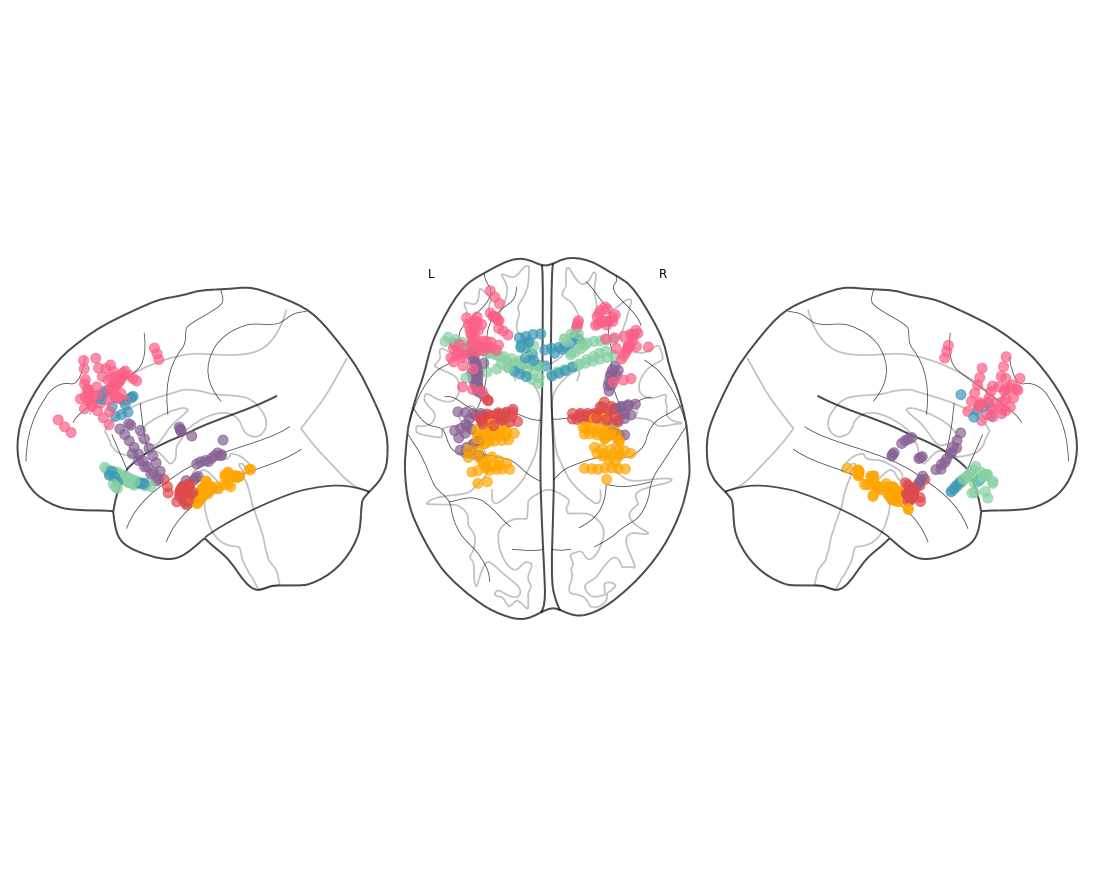

In [34]:
# %%ai

plt.rcParams['figure.figsize'] = [15, 12] 
fig = plt.figure(figsize=(15, 12))

# Extract coordinates and colors from the dataframe
coordinates = df[['X', 'Y', 'Z']].values
regions = df['region'].values

# Create a custom colormap if needed (e.g., based on the unique colors in your CSV)
unique_colors = np.unique(regions)
cmap = cm.get_cmap('viridis', len(unique_colors))
colors = [cmap(i) for i in np.linspace(0, 1, len(unique_colors))]
# colors = c("Amygdala" = "#DE4A4D", "Hippocampus" = "#FFA602", "OFC" =  "#88D1A3", "Ant. Cingulate"=  "#3D99BA", "Insula" =  "#876194",  "dlPFC" = "#FB6087")
colors = [
    (0.8706, 0.2902, 0.3020, .7), # red, amygdala
    (0.5294, 0.3804, 0.5804, .7), # purple, insula
    (1.0000, 0.6510, 0.0078, .7), # orange, hippocampus
    (0.2392, 0.6000, 0.7294, .7), # blue, cingulate
    (0.9843, 0.3765, 0.5294, .7), # pink, dlpfc
    (0.5333, 0.8196, 0.6392, .7) # green, ofc
]

# Create a dictionary that maps each unique value in df['Origin'] to a unique color
color_map = {region: color for region, color in zip(df['region'].unique(), colors)}

# Create a new 'Color' column based on the 'Origin' column
df['Color'] = df['region'].map(color_map).values
region_colors = df['Color'].values

# Plot the brain with the coordinates
# Create an adjacency matrix with zeros (no connections)
adjacency_matrix = np.zeros((len(coordinates), len(coordinates)))

# Plot the nodes without connections
plotting.plot_connectome(adjacency_matrix, coordinates, node_color=region_colors, node_size=100,  display_mode='lzr', figure=fig)


In [21]:
fig.savefig('./2024_MNI_plot.png')

In [17]:
plotting.view_connectome(adjacency_matrix, coordinates, node_color=region_colors, node_size=5, colorbar =False)


NameError: name 'adjacency_matrix' is not defined

In [19]:
# df